 Part 1: Big Data Processing (50 points)
 Task 1: Data Cleaning and Exploration (20 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

 Load the dataset into a Pandas DataFrame and print the meta data of column information

In [2]:
dt = pd.read_csv(r"C:\Users\LOKESH\Desktop\ESDS\2nd Sem\DIC\HW\HW 1\NVDA.csv")

In [3]:
dt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022/7/1,14.899,15.063000,14.392,14.523,14.506663,577610000.0
1,2022/7/5,14.175,14.971000,14.055,14.964,14.947166,651397000.0
2,2022/7/6,15.010,15.319000,14.789,15.130,15.112980,529066000.0
3,2022/7/7,15.456,15.945000,15.389,15.858,15.840160,492903000.0
4,2022/7/8,15.430,16.037001,15.389,15.838,15.820185,467972000.0


Check for missing values and handle them appropriately. (any proper processing is acceptable)

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       522 non-null    object 
 1   Open       521 non-null    float64
 2   High       522 non-null    float64
 3   Low        523 non-null    float64
 4   Close      522 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     521 non-null    float64
dtypes: float64(6), object(1)
memory usage: 28.7+ KB


In [5]:
dt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,521.000000,522.000000,523.000000,522.000000,523.000000,5.210000e+02
mean,46.843186,47.721960,46.009187,46.867692,46.932185,4.835298e+08
std,32.863158,33.579534,32.210175,32.876706,32.892753,1.578512e+08
min,10.971000,11.735000,10.813000,11.227000,11.217702,1.679340e+08
25%,18.181999,18.736000,17.914499,18.361499,18.367314,3.833870e+08
50%,42.321999,42.948999,41.654999,42.309500,42.304337,4.573280e+08
75%,60.049000,60.225751,59.504000,59.818251,60.444201,5.514090e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09


Convert the date column to a different datetime format (any different proper format is acceptable) and print it.

In [6]:
dt['Date'] = pd.to_datetime(dt['Date'])
dt2 = dt[(dt['Date'] >= '2022-07-01') & (dt['Date'] <= '2024-07-31')]

In [7]:
dt2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-01,14.899,15.063000,14.392,14.523,14.506663,577610000.0
1,2022-07-05,14.175,14.971000,14.055,14.964,14.947166,651397000.0
2,2022-07-06,15.010,15.319000,14.789,15.130,15.112980,529066000.0
3,2022-07-07,15.456,15.945000,15.389,15.858,15.840160,492903000.0
4,2022-07-08,15.430,16.037001,15.389,15.838,15.820185,467972000.0
5,2022-07-11,15.526,15.527000,15.038,15.152,15.134954,437321000.0
6,2022-07-12,15.268,15.431000,14.877,15.082,15.065034,458483000.0
7,2022-07-13,14.590,15.375000,14.465,15.164,15.146941,521918000.0
8,2022-07-14,15.108,15.473000,14.728,15.372,15.354707,456235000.0
9,2022-07-15,15.659,15.782000,15.445,15.762,15.744269,385935000.0


In [8]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       522 non-null    datetime64[ns]
 1   Open       520 non-null    float64       
 2   High       521 non-null    float64       
 3   Low        522 non-null    float64       
 4   Close      521 non-null    float64       
 5   Adj Close  522 non-null    float64       
 6   Volume     520 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 32.6 KB


Compute basic statistics (min, max, mean, median, standard deviation) for each numerical feature.

In [9]:
dt2.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,522,520.000000,521.000000,522.000000,521.000000,522.000000,5.200000e+02
mean,2023-07-15 15:29:39.310344704,46.684442,47.564420,45.853726,46.708877,46.773798,4.839583e+08
min,2022-07-01 00:00:00,10.971000,11.735000,10.813000,11.227000,11.217702,1.679340e+08
25%,2023-01-06 18:00:00,18.176499,18.718000,17.895249,18.334999,18.340843,3.839225e+08
50%,2023-07-17 12:00:00,42.287498,42.897999,41.651998,42.301998,42.296837,4.574970e+08
75%,2024-01-22 18:00:00,59.689750,59.910000,58.948750,59.653999,59.810533,5.514575e+08
max,2024-07-31 00:00:00,139.800003,140.759995,132.419998,135.580002,135.580002,1.543911e+09
std,NaN,32.694247,33.418158,32.044071,32.707265,32.724067,1.576996e+08


In [10]:
dt2.isnull().sum()

Date         0
Open         2
High         1
Low          0
Close        1
Adj Close    0
Volume       2
dtype: int64

In [11]:
dt2.isna().sum()

Date         0
Open         2
High         1
Low          0
Close        1
Adj Close    0
Volume       2
dtype: int64

In [12]:

mean_open = dt2['Open'].mean()
mean_high = dt2['High'].mean()
mean_close = dt2['Close'].mean()
mean_volume = dt2['Volume'].mean()


dt2.loc[dt2['Open'].isnull(), 'Open'] = mean_open
dt2.loc[dt2['High'].isnull(), 'High'] = mean_high
dt2.loc[dt2['Close'].isnull(), 'Close'] = mean_close
dt2.loc[dt2['Volume'].isnull(), 'Volume'] = mean_volume

Plot the closing price over time using Matplotlib.

In [13]:
dt2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

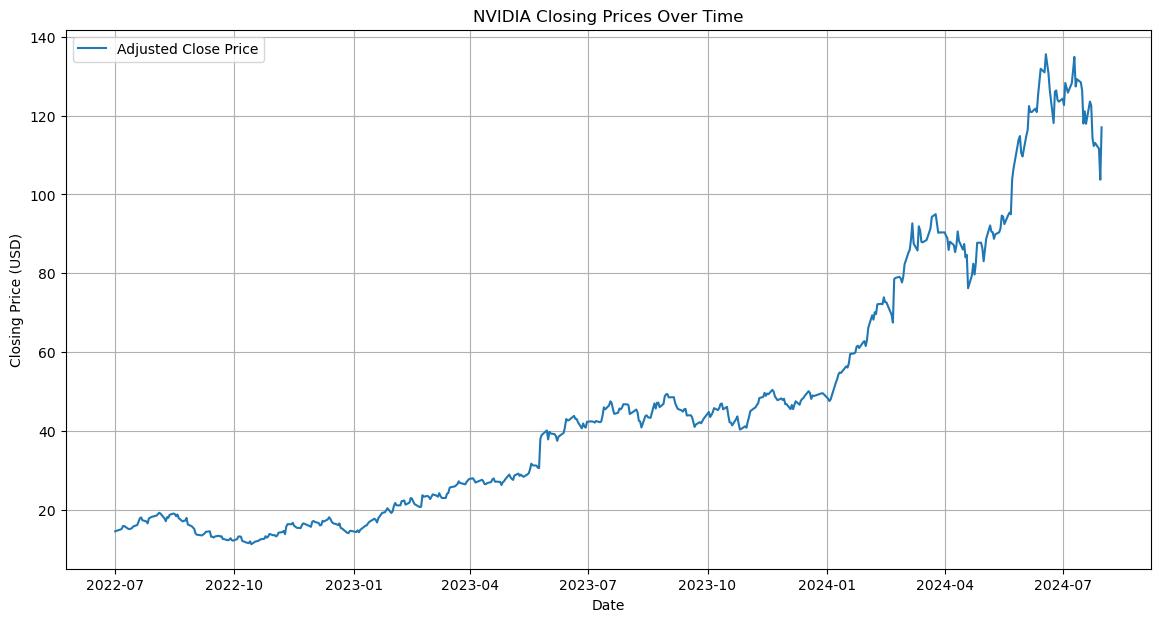

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(dt2['Date'], dt2['Adj Close'], label='Adjusted Close Price')
plt.title('NVIDIA Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Task 2: Feature Engineering (15 points)

Create a new column for daily returns based on the adjusted closing price (0 for the first day) and print the top 10 dates with the highest daily return.

In [15]:
dt2.loc[:,'Daily Returns'] = dt2['Adj Close'].pct_change().fillna(0)
top_returns = dt2.sort_values(by='Daily Returns', ascending=False).head(10)
top_returns[['Date', 'Daily Returns']]

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\3637871943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2.loc[:,'Daily Returns'] = dt2['Adj Close'].pct_change().fillna(0)


,Date,Daily Returns
226,2023-05-25,0.243696
412,2024-02-22,0.164009
92,2022-11-10,0.143293
162,2023-02-23,0.140214
522,2024-07-31,0.128121
476,2024-05-23,0.093197
285,2023-08-21,0.084713
105,2022-11-30,0.082379
17,2022-07-27,0.076030
140,2023-01-23,0.075901


In [16]:
dt2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,2022-07-01,14.899,15.063000,14.392,14.523,14.506663,577610000.0,0.000000
1,2022-07-05,14.175,14.971000,14.055,14.964,14.947166,651397000.0,0.030366
2,2022-07-06,15.010,15.319000,14.789,15.130,15.112980,529066000.0,0.011093
3,2022-07-07,15.456,15.945000,15.389,15.858,15.840160,492903000.0,0.048116
4,2022-07-08,15.430,16.037001,15.389,15.838,15.820185,467972000.0,-0.001261


Create a new column for the 7-day moving average of the closing price and plot it with Matplotlib.(any proper filling way of the first 6 days is acceptable)

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\1820254507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2.loc[:,'7-Day MA'] = dt2['Adj Close'].rolling(window=7, min_periods=1).mean()


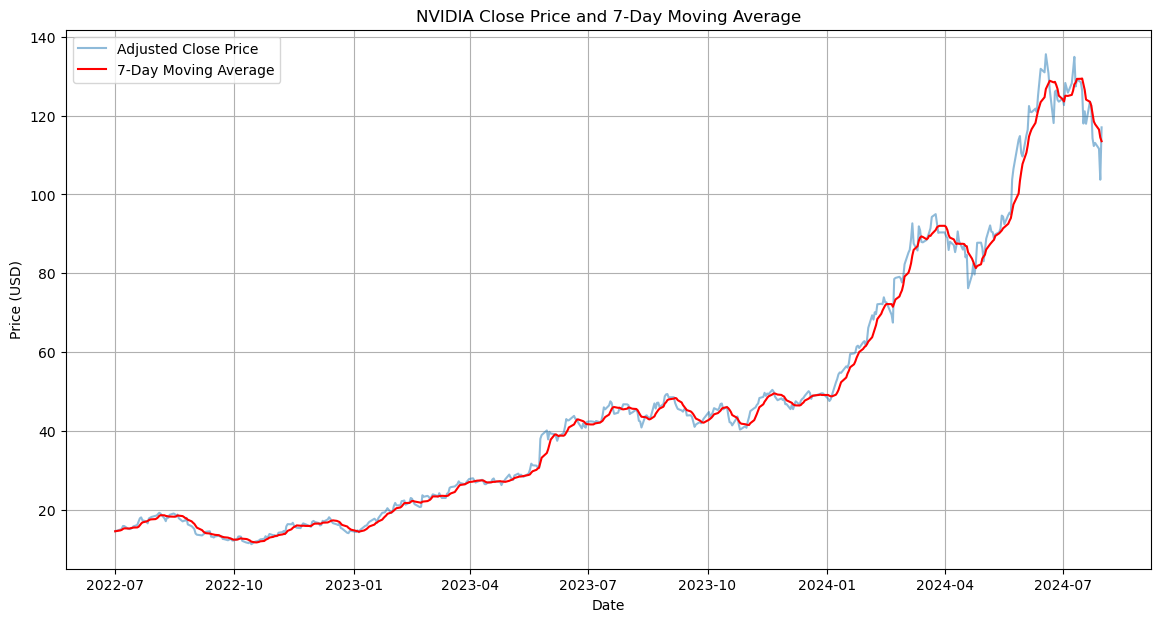

In [17]:
dt2.loc[:,'7-Day MA'] = dt2['Adj Close'].rolling(window=7, min_periods=1).mean()
plt.figure(figsize=(14, 7))
plt.plot(dt2['Date'], dt2['Adj Close'], label='Adjusted Close Price', alpha=0.5)
plt.plot(dt2['Date'], dt2['7-Day MA'], label='7-Day Moving Average', color='red')
plt.title('NVIDIA Close Price and 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

Normalize Trading volume column using Min-Max Scaling and print the top 10 dates with the
 highest volume.

In [18]:
scaler = MinMaxScaler()
dt2[['Normalized Daily Returns', 'Normalized Volume']] = scaler.fit_transform(dt2[['Daily Returns', 'Volume']])
features_for_clustering = dt2[['Normalized Daily Returns', 'Normalized Volume', 'Close']]
print(features_for_clustering.head())


   Normalized Daily Returns  Normalized Volume   Close
0                  0.291049           0.297735  14.523
1                  0.379388           0.351360  14.964
2                  0.323322           0.262455  15.130
3                  0.431027           0.236173  15.858
4                  0.287381           0.218055  15.838


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\406575408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2[['Normalized Daily Returns', 'Normalized Volume']] = scaler.fit_transform(dt2[['Daily Returns', 'Volume']])
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\406575408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2[['Normalized Daily Returns', 'Normalized Volume']] = scaler.fit_transform(dt2[['Daily Returns', 'Volume']])


Task 3: Data Visualization (15 points)

Create a histogram of daily returns.

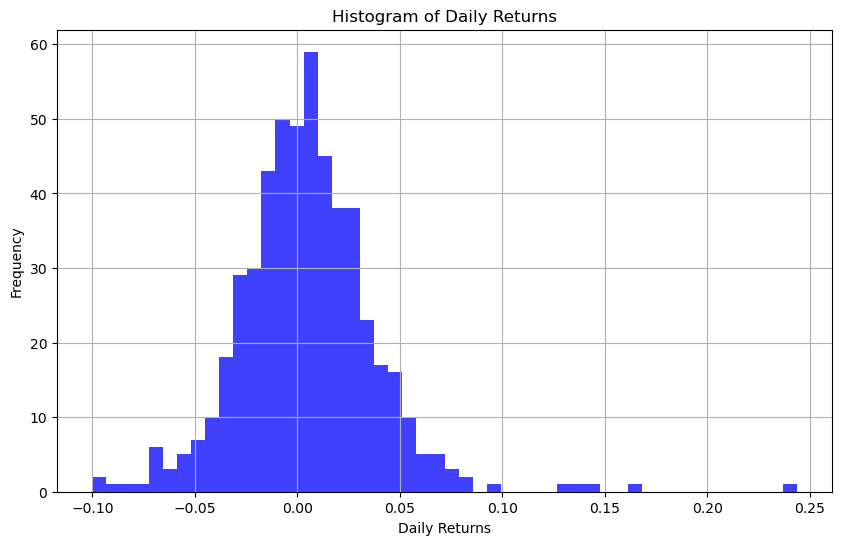

In [19]:
dt2.loc[:,'Daily Returns'] = dt2['Adj Close'].pct_change().fillna(0)
plt.figure(figsize=(10, 6))
plt.hist(dt2['Daily Returns'], bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Generate a boxplot of the trading volume.

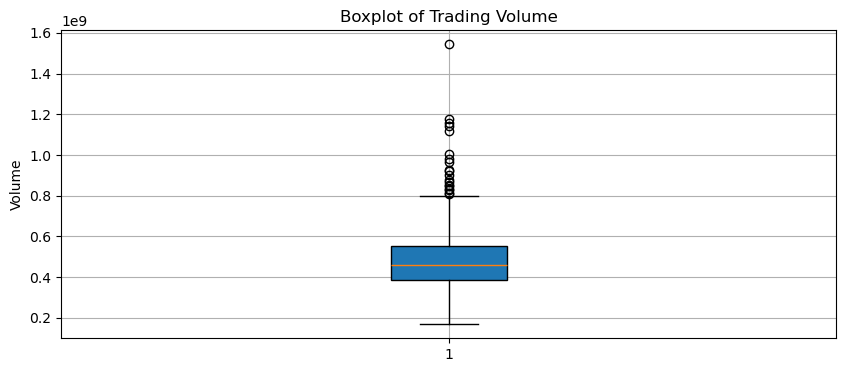

In [20]:
plt.figure(figsize=(10, 4))
plt.boxplot(dt2['Volume'], vert=True, patch_artist=True) 
plt.title('Boxplot of Trading Volume')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

Display a correlation heatmap of all numerical features. (Don’t consider newly added columns)

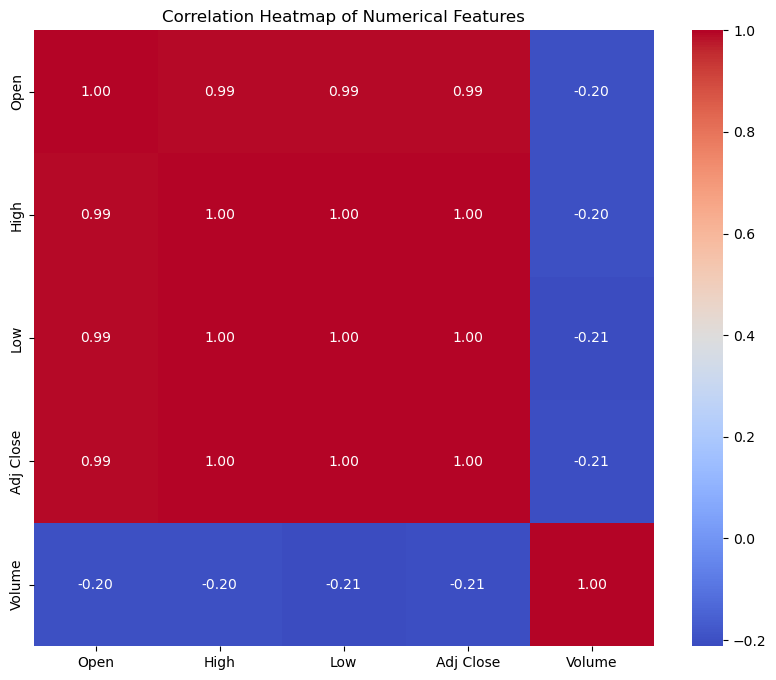

In [21]:
correlation_matrix = dt2[['Open', 'High', 'Low', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Part 2: Machine Learning (50 points)

Task 1: Clustering with KMeans (20 points)

Select relevant features for clustering (e.g., normalized daily return, trading volume, and adjusted close price).

In [22]:
dt2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,7-Day MA,Normalized Daily Returns,Normalized Volume
0,2022-07-01,14.899,15.063000,14.392,14.523,14.506663,577610000.0,0.000000,14.506663,0.291049,0.297735
1,2022-07-05,14.175,14.971000,14.055,14.964,14.947166,651397000.0,0.030366,14.726914,0.379388,0.351360
2,2022-07-06,15.010,15.319000,14.789,15.130,15.112980,529066000.0,0.011093,14.855603,0.323322,0.262455
3,2022-07-07,15.456,15.945000,15.389,15.858,15.840160,492903000.0,0.048116,15.101742,0.431027,0.236173
4,2022-07-08,15.430,16.037001,15.389,15.838,15.820185,467972000.0,-0.001261,15.245431,0.287381,0.218055


In [23]:
scaler = MinMaxScaler()
dt2.loc[:,['Normalized Daily Returns', 'Normalized Volume','Normalised close price']] = scaler.fit_transform(dt2[['Daily Returns', 'Volume', 'Adj Close']])
features_for_clustering = dt2[['Normalized Daily Returns', 'Normalized Volume', 'Adj Close']]


In [24]:
print(features_for_clustering.head())

   Normalized Daily Returns  Normalized Volume  Adj Close
0                  0.291049           0.297735  14.506663
1                  0.379388           0.351360  14.947166
2                  0.323322           0.262455  15.112980
3                  0.431027           0.236173  15.840160
4                  0.287381           0.218055  15.820185


In [25]:
dt2.isnull().sum()

Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Daily Returns               0
7-Day MA                    0
Normalized Daily Returns    0
Normalized Volume           0
Normalised close price      0
dtype: int64

Determine the optimal number of clusters using the elbow method.

c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

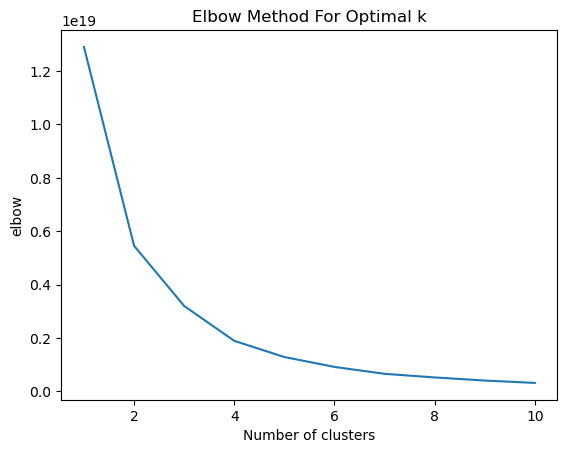

In [ ]:
elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dt2[['Daily Returns', 'Volume']])
    elbow.append(kmeans.inertia_)


plt.plot(range(1, 11), elbow)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('elbow')  # Within cluster sum of squares
plt.show()

c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\1331081971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Cluster'] = cluster_labels


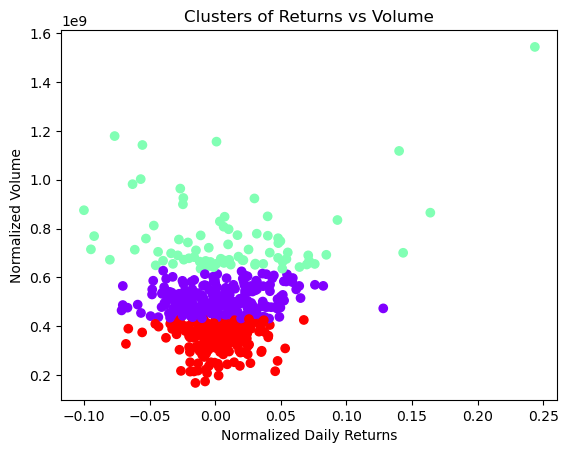

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(dt2[['Daily Returns', 'Volume']])

dt2['Cluster'] = cluster_labels

plt.scatter(dt2['Daily Returns'], dt2['Volume'], c=dt2['Cluster'], cmap='rainbow')
plt.title('Clusters of Returns vs Volume')
plt.xlabel('Normalized Daily Returns')
plt.ylabel('Normalized Volume')
plt.show()


Interpret the clusters and describe potential insights.

 Task 2: Other machine learning methods (30 points)

Linear Regression

In [ ]:
dt2['Previous Close'] = dt2['Close'].shift(1).fillna(method='bfill')

X = dt2[[ 'Previous Close']]
y = dt2['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 6.175160049518952
R^2 Score: 0.9951873018430035


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\3982571749.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dt2['Previous Close'] = dt2['Close'].shift(1).fillna(method='bfill')
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\3982571749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Previous Close'] = dt2['Close'].shift(1).fillna(method='bfill')


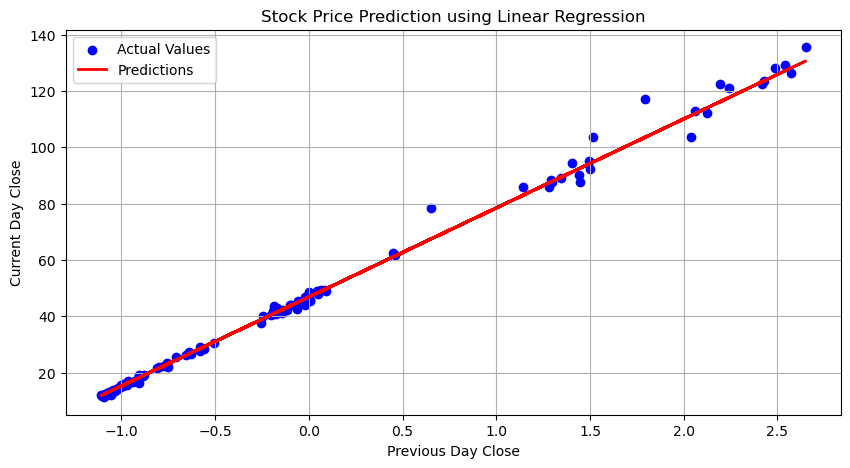

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, predictions, color='red', linewidth=2, label='Predictions')
plt.title('Stock Price Prediction using Linear Regression')
plt.xlabel('Previous Day Close')
plt.ylabel('Current Day Close')
plt.legend()
plt.grid(True)
plt.show()

Logistic Regression

In [ ]:
dt2['Previous Close'] = dt2['Close'].shift(1).fillna(method='bfill')
dt2['Price Change'] = dt2['Close'].diff().fillna(0)
dt2['Trend'] = (dt2['Price Change'] > 0).astype(int)

X = dt2[['Price Change','Previous Close']]
y = dt2['Trend']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.009523809523809525
R2 Score: 0.9606151537884471


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\3256908381.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dt2['Previous Close'] = dt2['Close'].shift(1).fillna(method='bfill')
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\3256908381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Previous Close'] = dt2['Close'].shift(1).fillna(method='bfill')
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\3256908381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

NaiveBayes

In [31]:
dt2['Trend'] = (dt2['Close'].shift(-1) > dt2['Close']).astype(int)
X = dt2[['Open', 'High', 'Low', 'Volume']] .iloc[:-1] 
y = dt2['Trend'].iloc[:-1] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.6095238095238096


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\1883570485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Trend'] = (dt2['Close'].shift(-1) > dt2['Close']).astype(int)


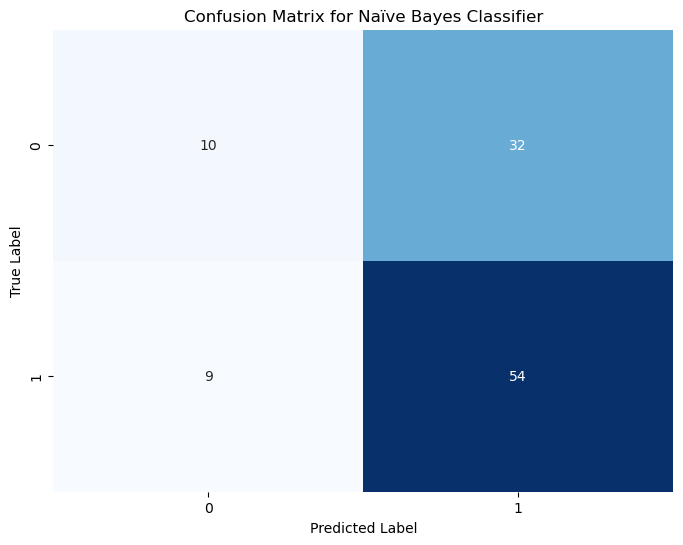

In [32]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naïve Bayes Classifier')
plt.show()


 k-Nearest Neighbors (k-NN) for Trend Classification

In [43]:
dt2['Trend'] = (dt2['Close'].shift(-1) > dt2['Close']).astype(int)


X = dt2[[ 'Open','High', 'Low', 'Volume']].iloc[:-1]
y = dt2['Trend'].iloc[:-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.6


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\1432195046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Trend'] = (dt2['Close'].shift(-1) > dt2['Close']).astype(int)


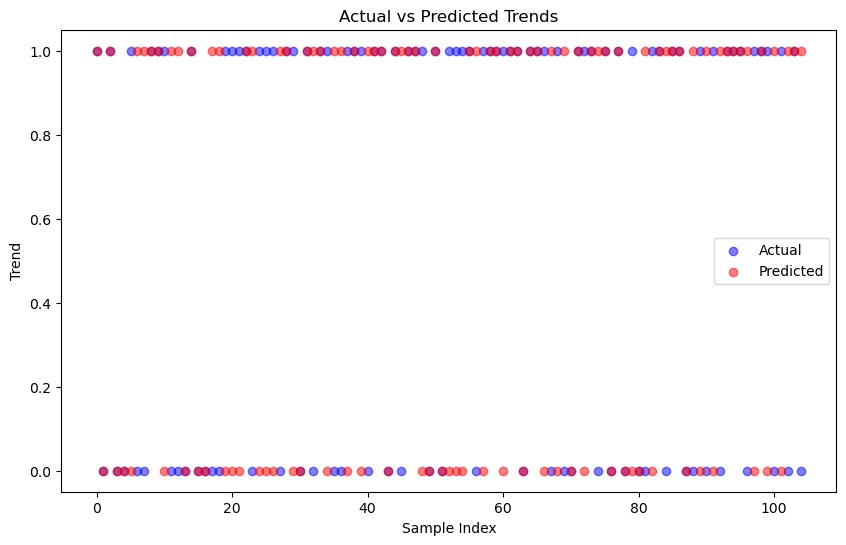

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Trends')
plt.xlabel('Sample Index')
plt.ylabel('Trend')
plt.legend()
plt.show()



k-Means Clustering

c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LOKESH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_20220\1020855335.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Cluster'] = labels


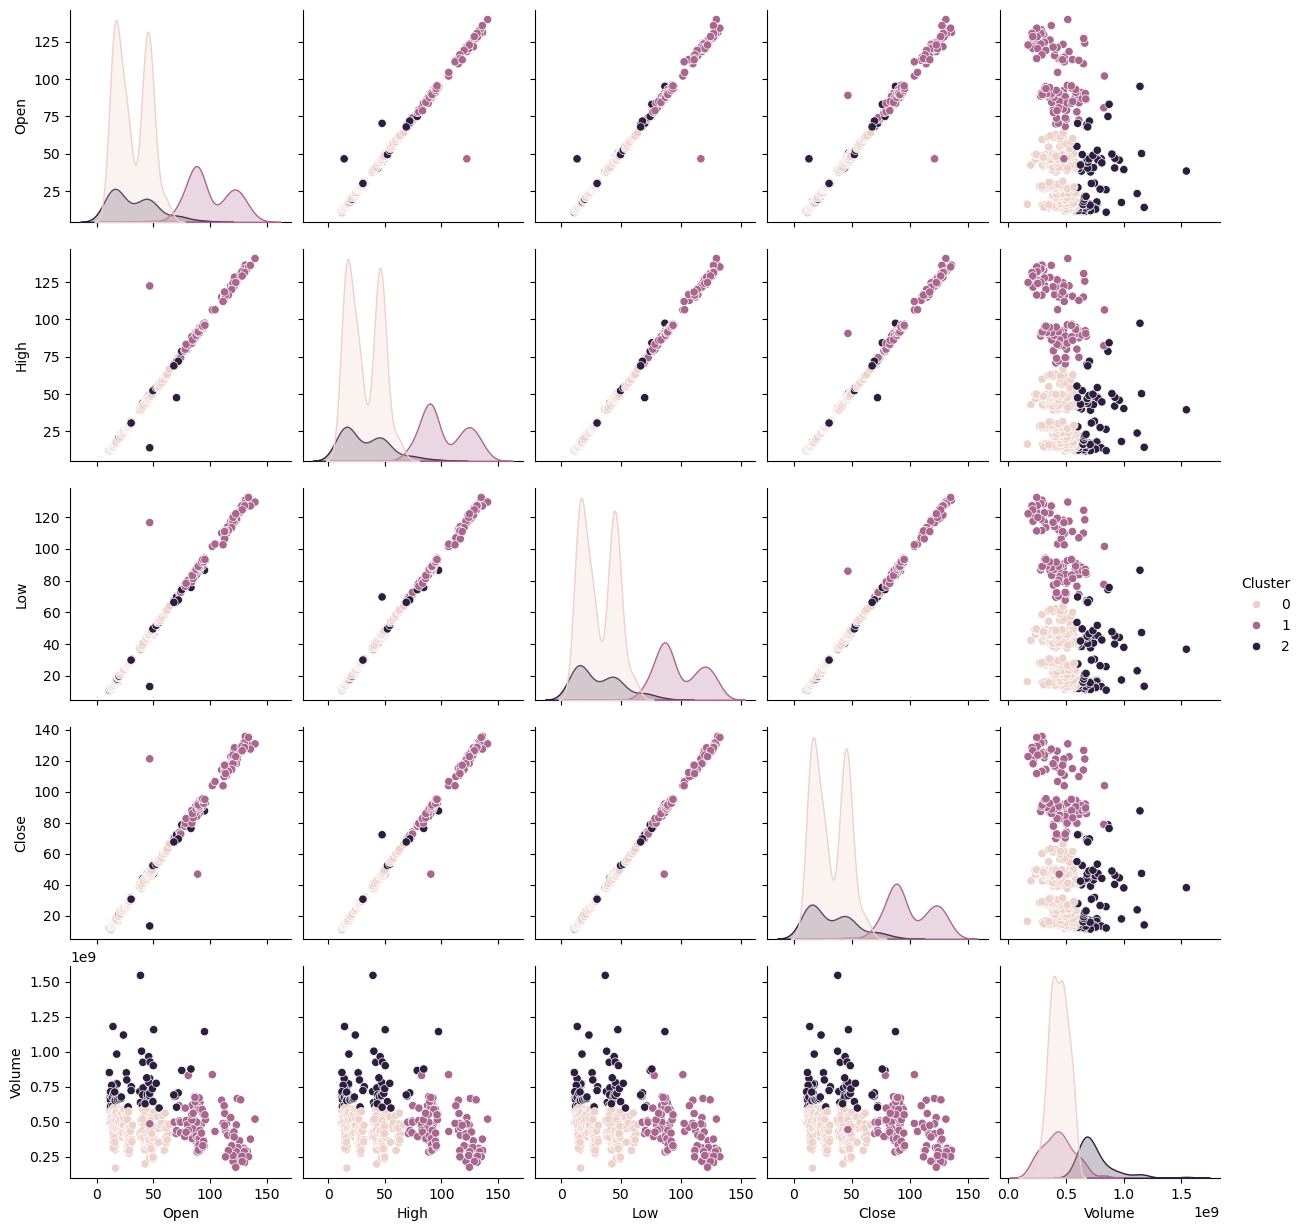

Cluster Centers:
[[-0.46309242 -0.46394841 -0.46054508 -0.46133594 -0.28872611]
 [ 1.62904365  1.64097147  1.63825513  1.63367571 -0.31021485]
 [-0.42058281 -0.43473519 -0.44552785 -0.43520392  1.72659951]]


In [ ]:
X = dt2 [['Open', 'High', 'Low', 'Close', 'Volume']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_


dt2['Cluster'] = labels
sns.pairplot(dt2, hue='Cluster', vars=['Open', 'High', 'Low', 'Close', 'Volume'])
plt.show()

centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(centers)


In [ ]:
dt2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,7-Day MA,Normalized Daily Returns,Normalized Volume,Normalised close price,Cluster,Previous Close,Price Change,Trend
0,2022-07-01,14.899,15.063000,14.392,14.523,14.506663,577610000.0,0.000000,14.506663,0.291049,0.297735,0.026447,0,14.523,0.000,1
1,2022-07-05,14.175,14.971000,14.055,14.964,14.947166,651397000.0,0.030366,14.726914,0.379388,0.351360,0.029989,0,14.523,0.441,1
2,2022-07-06,15.010,15.319000,14.789,15.130,15.112980,529066000.0,0.011093,14.855603,0.323322,0.262455,0.031322,0,14.964,0.166,1
3,2022-07-07,15.456,15.945000,15.389,15.858,15.840160,492903000.0,0.048116,15.101742,0.431027,0.236173,0.037169,0,15.130,0.728,0
4,2022-07-08,15.430,16.037001,15.389,15.838,15.820185,467972000.0,-0.001261,15.245431,0.287381,0.218055,0.037009,0,15.858,-0.020,0


EXTRA ALGORITHMS FOR BONUS POINTS

RandomForestRegressor

In [ ]:
dt2['Price Change'] = dt2['Close'].diff().fillna(0)
dt2['Trend'] = (dt2['Price Change'] > 0).astype(int)

X = dt2[[ 'Price Change']]
y = dt2['Trend']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("R^2 Score:", r2_score(y_test, predictions))


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_17500\2634435791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Price Change'] = dt2['Close'].diff().fillna(0)
C:\Users\LOKESH\AppData\Local\Temp\ipykernel_17500\2634435791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Trend'] = (dt2['Price Change'] > 0).astype(int)


Mean Squared Error: 0.00046095238095238096
R^2 Score: 0.9980937734433608


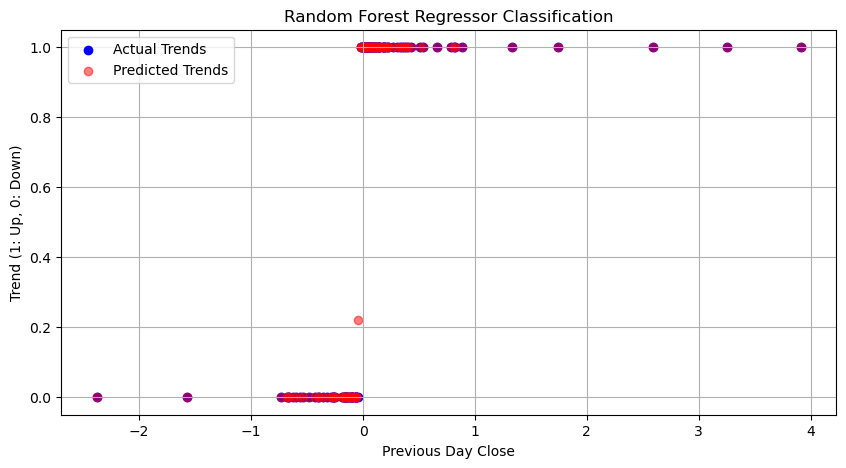

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Trends')
plt.scatter(X_test, predictions, color='red', label='Predicted Trends', alpha=0.5)
plt.title('Random Forest Regressor Classification')
plt.xlabel('Previous Day Close')
plt.ylabel('Trend (1: Up, 0: Down)')
plt.legend()
plt.grid(True)
plt.show()

SVM Support Vector Machine

In [ ]:
dt2['Trend'] = (dt2['Close'].shift(-1) > dt2['Close']).astype(int)


X = dt2[['Open', 'High', 'Low', 'Close', 'Volume']].iloc[:-1]  # Modify as needed
y = dt2['Trend'].iloc[:-1]  # Remove the last na value

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.6095238095238096
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.17      0.25        42
           1       0.62      0.90      0.74        63

    accuracy                           0.61       105
   macro avg       0.58      0.54      0.50       105
weighted avg       0.59      0.61      0.54       105



C:\Users\LOKESH\AppData\Local\Temp\ipykernel_17500\1016691189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt2['Trend'] = (dt2['Close'].shift(-1) > dt2['Close']).astype(int)


In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
